  # Customer Service Requests Analysis


In [140]:
#import python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from math import sqrt


In [3]:
# import a 311 NYC service request
data=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
data.shape

(300698, 53)

In [7]:
data.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
data.dtypes
 

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

# Read or convert the columns 'Created Date' and 'Closed Date'to datetime datatype and create a column 'Request_Closing_Time' as the time elapsed between request creation and request closing.

In [9]:
#data tyoes of 'Created Date','Closed Date'
print(data['Created Date'].dtypes)
print(data['Closed Date'].dtypes)

object
object


In [10]:
#convert the columns 'Creates Date',Closed Date'to datetime datatype
data['Created Date']=pd.to_datetime(data['Created Date'])
data['Closed Date']=pd.to_datetime(data['Closed Date'])

In [11]:
print(data['Created Date'].dtypes)
print(data['Closed Date'].dtypes)

datetime64[ns]
datetime64[ns]


In [12]:
#create a new column 'Request_Closing_Time'
data['Request_Closing_Time']=data['Closed Date']-data['Created Date']

In [13]:
data['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

Provide major insights/patterns that you can offer in a visual format(graphs or tables)

In [20]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [22]:
data['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

# INSIGHT 1 

 

<AxesSubplot:xlabel='City'>

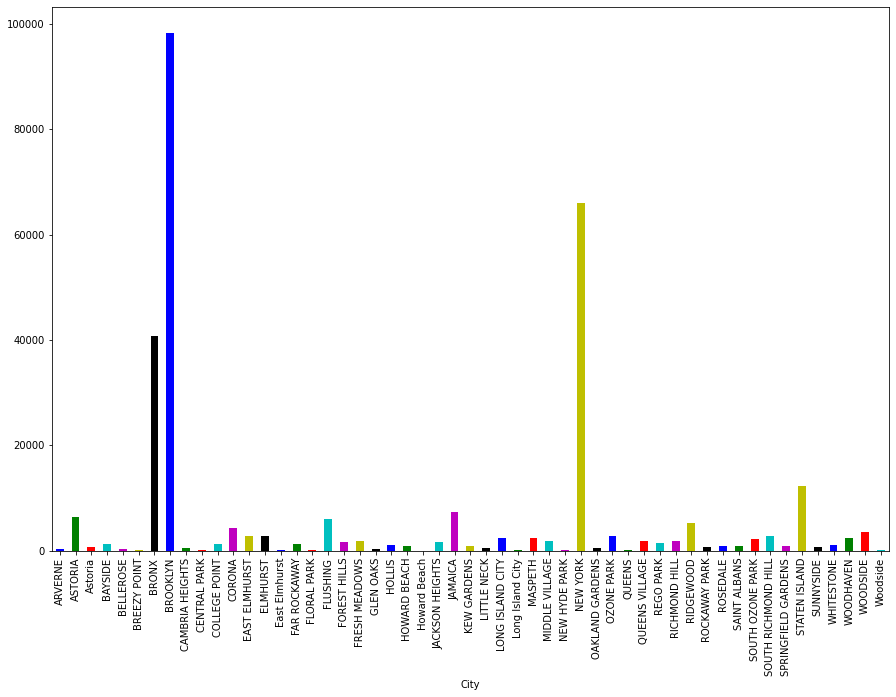

In [32]:
#find two major cities with max number of incidents
data.groupby('City').size().sort_values()

#visualize the above results
data.groupby('City').size().plot(kind='bar',figsize=(15,10),color=list('bgrcmyk'))

 # INSIGHT 2

In [105]:
#find complaint type by city
city_complaints=data.groupby(['City','Complaint Type']).size() 

city_complaints.tail(20)

City      Complaint Type          
WOODSIDE  Derelict Vehicle            247
          Disorderly Youth              1
          Drinking                     15
          Graffiti                      3
          Homeless Encampment          33
          Illegal Fireworks             1
          Illegal Parking             891
          Noise - Commercial          209
          Noise - House of Worship      3
          Noise - Park                 38
          Noise - Street/Sidewalk     250
          Noise - Vehicle             105
          Traffic                      39
          Urinating in Public           8
          Vending                      15
Woodside  Blocked Driveway             11
          Derelict Vehicle              2
          Illegal Parking             100
          Noise - Commercial            2
          Noise - Street/Sidewalk       5
dtype: int64

<AxesSubplot:ylabel='Complaint Type'>

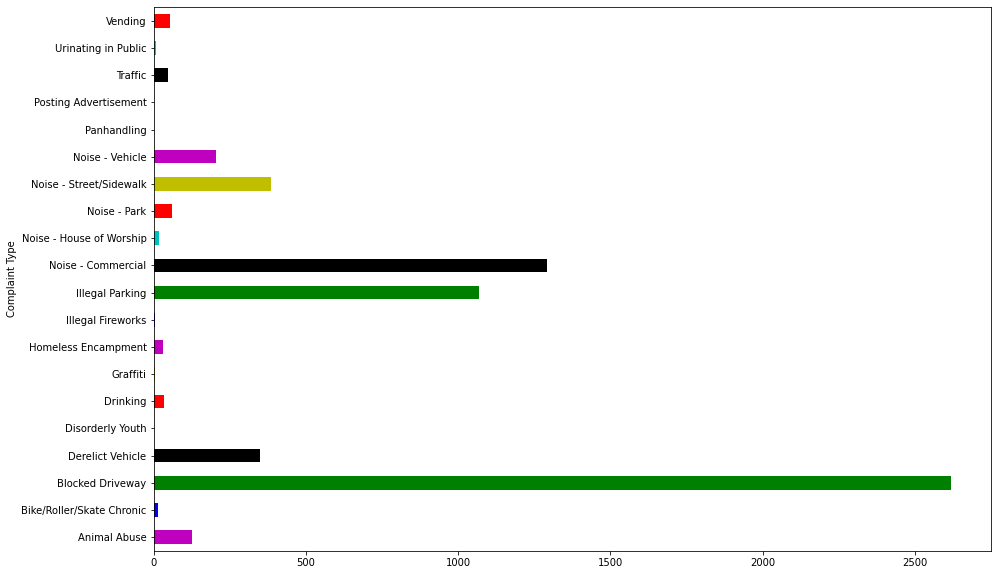

In [66]:
city_complaints['ASTORIA'].plot(kind='barh',figsize=(15,10),color=list('mbgkcry'))

<AxesSubplot:ylabel='Complaint Type'>

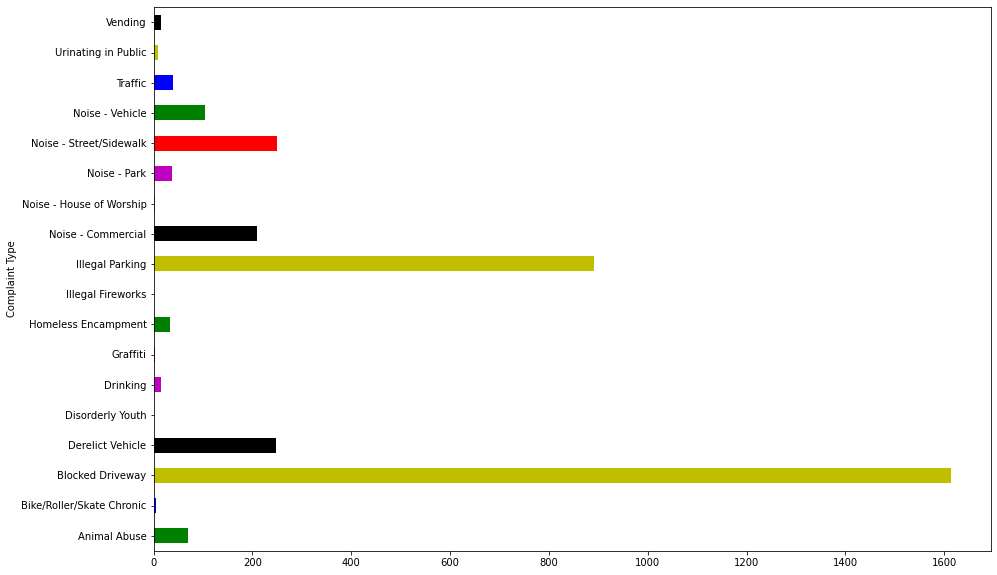

In [69]:
city_complaints['WOODSIDE'].plot(kind='barh',figsize=(15,10),color=list('gbykcmr'))

 # INSIGHT 3
    
    

In [ ]:
 #top 10 reported complaint types
complaints_types=data['Complaint Type'].value_counts()
complaints_types

<AxesSubplot:ylabel='Complaint Type'>

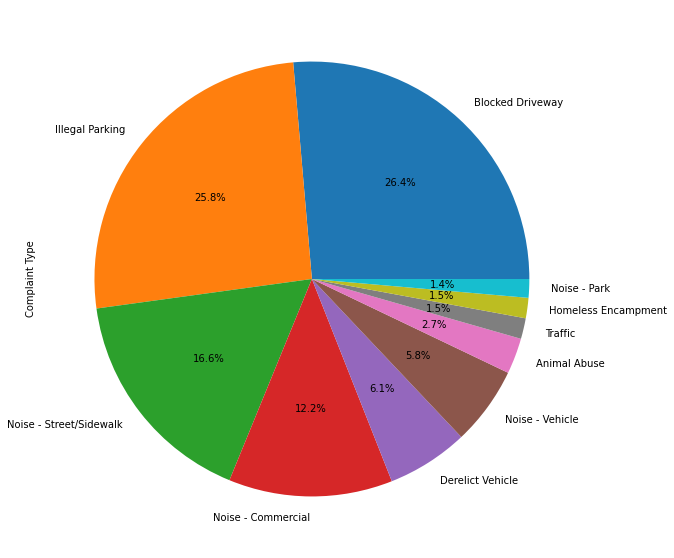

In [101]:
#pie plot for visualize the major complaint type
complaints_types.head(10).plot(kind='pie',autopct='%.1f%%',figsize=(15,10))


# INSIGHT 4


In [108]:
#status of tickets
#bar plot to check count for status type
data['Status'].value_counts()  

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

<AxesSubplot:>

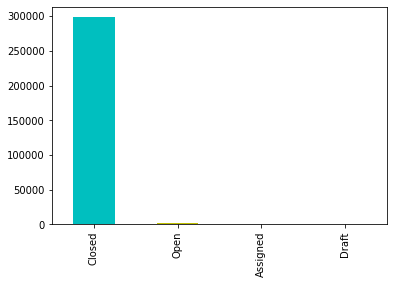

In [114]:
data['Status'].value_counts().plot(kind='bar',color=list('cymgb'))

In [118]:
 data['Borough'].value_counts()
 

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

<AxesSubplot:ylabel='Borough'>

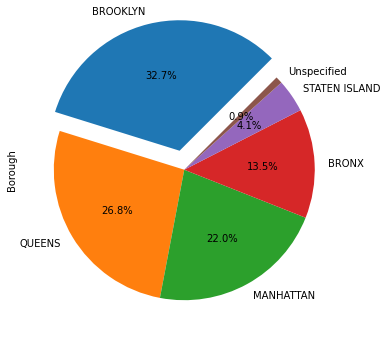

In [121]:
data['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0,0,0), startangle=45, shadow=False,
                        figsize = (8,6))
 

# Order the complaint types based on the average ‘Request_Closing_Time’,grouping them for different locations



In [129]:
order=data.sort_values(['Complaint Type','Request_Closing_Time'],ascending=False)

In [130]:
order

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
74733,31795815,2015-10-19 12:04:18,2015-10-22 16:59:46,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,10452.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.836109,-73.922371,"(40.836109332951686, -73.92237130532254)",3 days 04:55:28
74230,31787800,2015-10-19 22:50:09,2015-10-22 17:14:35,NYPD,New York City Police Department,Vending,In Prohibited Area,Street/Sidewalk,10452.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.836109,-73.922371,"(40.836109332951686, -73.92237130532254)",2 days 18:24:26
163581,31212979,2015-08-01 17:00:00,2015-08-04 10:11:00,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,11432.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.706869,-73.790797,"(40.70686853887864, -73.79079681810872)",2 days 17:11:00
42678,32014237,2015-11-18 15:58:13,2015-11-21 08:20:49,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,10452.0,11 EAST 167 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835947,-73.921887,"(40.835947068130764, -73.92188724241109)",2 days 16:22:36
77739,31767001,2015-10-16 15:32:45,2015-10-18 19:34:13,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,10452.0,12 EAST 167 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835964,-73.921988,"(40.83596360487519, -73.92198841005695)",2 days 04:01:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186023,31059332,2015-07-12 17:01:00,2015-07-13 00:33:00,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 07:32:00
239986,30709273,2015-05-27 16:39:39,2015-05-27 23:31:05,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 06:51:26
279079,30460208,2015-04-22 09:33:01,2015-04-22 12:30:09,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:57:08
207251,30928156,2015-06-24 13:38:01,2015-06-24 16:20:17,NYPD,Internal Affairs Bureau,Agency Issues,Language Access Complaint,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:42:16


# Perform a statistical test 
# H0:all Complaint types average response time mean is similar
# H1: not similar

In [133]:
data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [141]:
top5_complaints=data['Complaint Type'].value_counts()[:10]
top5_complaints

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [142]:
top5_complaints_names=top10_complaints.index
top5_complaints_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Noise - Park'],
      dtype='object')

In [149]:
sub_data=data.loc[data['Complaint Type'].isin(top5_complaints_names),['Complaint Type','Request_Closing_Time']]
sub_data.head()


,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,00:55:15
1,Blocked Driveway,01:26:16
2,Blocked Driveway,04:51:31
3,Illegal Parking,07:45:14
4,Illegal Parking,03:27:02


In [145]:
sub_data.isnull().sum()

Complaint Type             0
Request_Closing_Time    2141
dtype: int64

In [146]:
sub_data.shape

(292129, 2)

In [150]:
sub_data.dropna(how='any',inplace=True)

In [151]:
sub_data.isnull().sum()

Complaint Type          0
Request_Closing_Time    0
dtype: int64

In [156]:

sampledata=pd.crosstab(data['Complaint Type'],data['Location Type'])
sampledata

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,,,
Animal Abuse,0,0,62,0,0,93,0,0,123,110,227,5085,0,522,1531,22,0,0
Animal in a Park,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,0,26,0,53,348,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77007,0,0,0
Derelict Vehicle,0,0,0,0,14,0,0,0,0,0,0,0,5,0,17614,0,0,77
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,0,77,0,8,201,0,0,0
Drinking,0,366,0,0,0,0,0,0,98,0,0,291,0,90,434,0,0,0
Ferry Complaint,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Graffiti,0,0,0,0,0,0,0,0,0,0,0,56,0,32,25,0,0,0


In [157]:
# chisquare test
stats.chi2_contingency(sampledata)

(1638407.580569627,
 0.0,
 374,
 array([[5.17355531e-02, 4.49064601e+02, 1.60380215e+00, 2.58677766e-02,
         5.56157196e+00, 2.40570322e+00, 2.40311644e+01, 2.58677766e-02,
         1.23466898e+02, 3.02652986e+00, 5.87198528e+00, 1.80039725e+02,
         9.05372180e-01, 5.27211154e+02, 6.44881083e+03, 8.79504403e-01,
         2.58677766e-02, 1.99181880e+00],
        [6.65409044e-06, 5.77575050e-02, 2.06276804e-04, 3.32704522e-06,
         7.15314722e-04, 3.09415205e-04, 3.09082501e-03, 3.32704522e-06,
         1.58799868e-02, 3.89264290e-04, 7.55239264e-04, 2.31562347e-02,
         1.16446583e-04, 6.78085086e-02, 8.29429046e-01, 1.13119537e-04,
         3.32704522e-06, 2.56182482e-04],
        [2.84129662e-03, 2.46624546e+01, 8.80801951e-02, 1.42064831e-03,
         3.05439386e-01, 1.32120293e-01, 1.31978228e+00, 1.42064831e-03,
         6.78075437e+00, 1.66215852e-01, 3.22487166e-01, 9.88771222e+00,
         4.97226908e-02, 2.89542332e+01, 3.54166203e+02, 4.83020425e-02,
        

In [158]:
chisquare,p_value,df,frequency=stats.chi2_contingency(sampledata)

In [159]:
p_value

0.0

# p_value is less than 0.05 significant level,we have to reject the null hypothesis
# from chisquare test,that average response time is not same.